In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
#loading datasets
match_info = pd.read_csv('/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_info.csv')
match_data = pd.read_csv('/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_Data.csv', dtype={'season': str})

In [4]:
match_info.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [5]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [6]:
#checking for missing values
match_info.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [7]:
match_data.isnull().sum()

match_id                        0
season                          0
start_date                      0
venue                           0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                     1236113
noballs                   1260045
byes                      1263141
legbyes                   1252200
penalty                   1265085
wicket_type               1230629
player_dismissed          1230629
other_wicket_type         1265103
other_player_dismissed    1265103
cricsheet_id                    0
dtype: int64

In [8]:
#checking duplicates
match_info[match_info.duplicated(keep=False)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [9]:
match_data[match_data.duplicated(keep=False)]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
22333,1377770,2023,2023-07-02,"Queens Sports Club, Bulawayo",1,12.1,Zimbabwe,Sri Lanka,SC Williams,Sikandar Raza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1377770
22342,1377770,2023,2023-07-02,"Queens Sports Club, Bulawayo",1,12.1,Zimbabwe,Sri Lanka,SC Williams,Sikandar Raza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1377770
103976,1325549,2022,2022-08-18,Harare Sports Club,2,1.1,India,Zimbabwe,Shubman Gill,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1325549
103985,1325549,2022,2022-08-18,Harare Sports Club,2,1.1,India,Zimbabwe,Shubman Gill,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1325549
368977,1130737,2017/18,2018-01-15,"Shere Bangla National Stadium, Mirpur",2,27.1,Bangladesh,Zimbabwe,Tamim Iqbal,Mushfiqur Rahim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1130737
368986,1130737,2017/18,2018-01-15,"Shere Bangla National Stadium, Mirpur",2,27.1,Bangladesh,Zimbabwe,Tamim Iqbal,Mushfiqur Rahim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1130737
542492,656425,2014/15,2015-02-23,Hagley Oval,1,1.1,England,Scotland,MM Ali,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656425
542501,656425,2014/15,2015-02-23,Hagley Oval,1,1.1,England,Scotland,MM Ali,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656425
618837,636162,2013/14,2014-01-24,Western Australia Cricket Association Ground,1,1.1,England,Australia,AN Cook,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636162
618846,636162,2013/14,2014-01-24,Western Australia Cricket Association Ground,1,1.1,England,Australia,AN Cook,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636162


In [10]:
#removing duplicates
match_data.drop_duplicates(inplace=True)

In [11]:
#checking data types
match_info.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [12]:
#converting date coluumns into datetime
match_info['date'] = pd.to_datetime(match_info['date'])

In [13]:
match_data.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
cricsheet_id                int64
dtype: object

In [14]:
match_data['start_date'] = pd.to_datetime(match_data['start_date'])

In [15]:
#basic statistics
match_info.describe()

,id,date,dl_applied,win_by_runs,win_by_wickets
count,2.379000e+03,2379,2379.000000,2379.000000,2379.000000
mean,7.114354e+05,2013-09-22 06:47:21.866330368,0.084489,34.680538,2.750736
min,6.481400e+04,2002-12-29 00:00:00,0.000000,0.000000,0.000000
25%,3.353495e+05,2008-06-29 00:00:00,0.000000,0.000000,0.000000
50%,6.490950e+05,2013-11-10 00:00:00,0.000000,0.000000,0.000000
75%,1.144488e+06,2018-10-08 00:00:00,0.000000,58.000000,6.000000
max,1.395701e+06,2023-09-24 00:00:00,1.000000,317.000000,10.000000
std,4.287345e+05,NaN,0.278179,53.989592,3.238695


In [16]:
#exploring categorical columns
match_info['team1'].value_counts()

team1
Australia                   254
India                       252
England                     225
Sri Lanka                   192
Bangladesh                  191
New Zealand                 182
South Africa                172
West Indies                 172
Zimbabwe                    144
Pakistan                    139
Ireland                      83
Afghanistan                  66
Scotland                     50
United Arab Emirates         47
Netherlands                  26
Kenya                        25
Canada                       24
Namibia                      23
Papua New Guinea             23
Oman                         22
United States of America     22
Nepal                        21
Hong Kong                    10
Bermuda                       7
Africa XI                     5
Jersey                        2
Name: count, dtype: int64

In [17]:
match_info['city'].value_counts()

city
Mirpur              89
Colombo             87
London              83
Bulawayo            63
Harare              57
                    ..
Jamshedpur           1
Lincoln              1
Bready               1
Tarouba              1
Pietermaritzburg     1
Name: count, Length: 145, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '2023/24'),
  Text(1, 0, '2023'),
  Text(2, 0, '2022/23'),
  Text(3, 0, '2022'),
  Text(4, 0, '2021/22'),
  Text(5, 0, '2021'),
  Text(6, 0, '2020/21'),
  Text(7, 0, '2020'),
  Text(8, 0, '2019/20'),
  Text(9, 0, '2019'),
  Text(10, 0, '2018/19'),
  Text(11, 0, '2018'),
  Text(12, 0, '2017/18'),
  Text(13, 0, '2017'),
  Text(14, 0, '2016/17'),
  Text(15, 0, '2016'),
  Text(16, 0, '2015/16'),
  Text(17, 0, '2015'),
  Text(18, 0, '2014/15'),
  Text(19, 0, '2014'),
  Text(20, 0, '2013/14'),
  Text(21, 0, '2013'),
  Text(22, 0, '2012/13'),
  Text(23, 0, '2012'),
  Text(24, 0, '2011/12'),
  Text(25, 0, '2011'),
  Text(26, 0, '2010/11'),
  Text(27, 0, '2010'),
  Text(28, 0, '2009/10'),
  Text(29, 0, '2009'),
  Text(30, 0, '2008/09'),
  Text(31, 0, '2008'),
  Text(32, 0, '2007/08'),
  

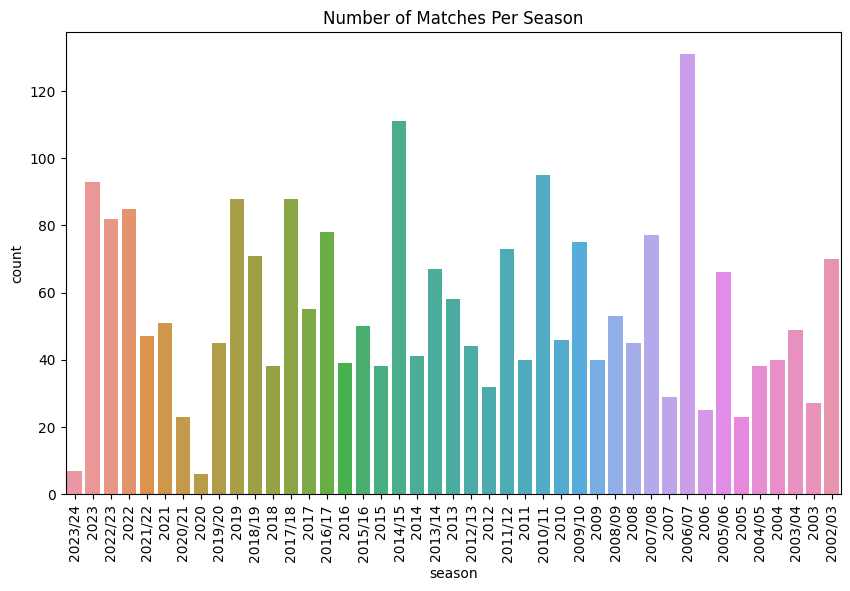

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=match_info)
plt.title('Number of Matches Per Season')
plt.xticks(rotation=90)

In [19]:
matches_per_season = match_info['season'].value_counts().sort_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '2002/03'),
  Text(1, 0, '2003'),
  Text(2, 0, '2003/04'),
  Text(3, 0, '2004'),
  Text(4, 0, '2004/05'),
  Text(5, 0, '2005'),
  Text(6, 0, '2005/06'),
  Text(7, 0, '2006'),
  Text(8, 0, '2006/07'),
  Text(9, 0, '2007'),
  Text(10, 0, '2007/08'),
  Text(11, 0, '2008'),
  Text(12, 0, '2008/09'),
  Text(13, 0, '2009'),
  Text(14, 0, '2009/10'),
  Text(15, 0, '2010'),
  Text(16, 0, '2010/11'),
  Text(17, 0, '2011'),
  Text(18, 0, '2011/12'),
  Text(19, 0, '2012'),
  Text(20, 0, '2012/13'),
  Text(21, 0, '2013'),
  Text(22, 0, '2013/14'),
  Text(23, 0, '2014'),
  Text(24, 0, '2014/15'),
  Text(25, 0, '2015'),
  Text(26, 0, '2015/16'),
  Text(27, 0, '2016'),
  Text(28, 0, '2016/17'),
  Text(29, 0, '2017'),
  Text(30, 0, '2017/18'),


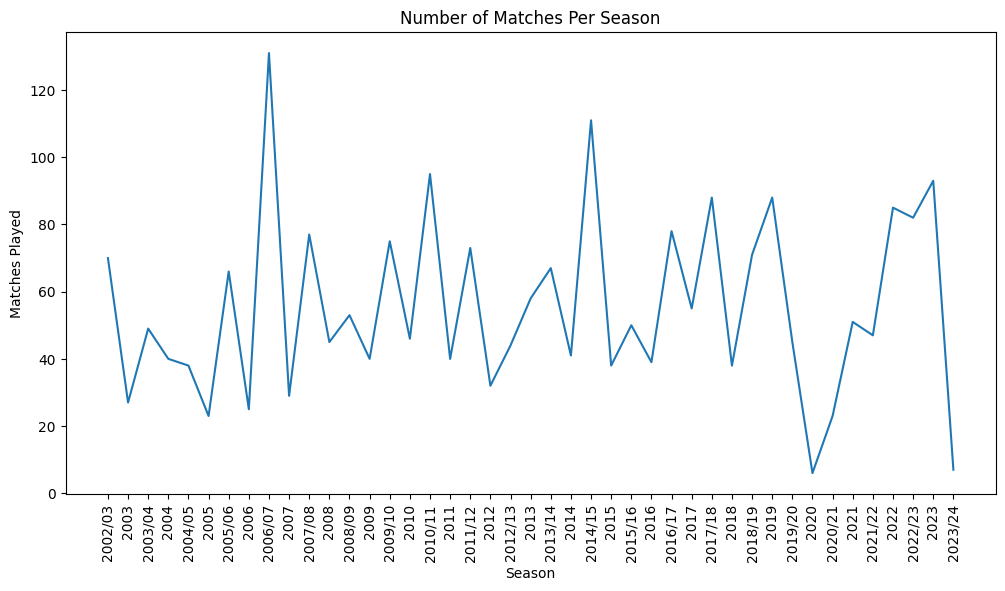

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title('Number of Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Matches Played')
plt.xticks(rotation=90)

In [21]:
#calculation wins per team
team_wins = match_info['winner'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Sri Lanka'),
  Text(3, 0, 'South Africa'),
  Text(4, 0, 'England'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'West Indies'),
  Text(8, 0, 'Bangladesh'),
  Text(9, 0, 'Zimbabwe'),
  Text(10, 0, 'Afghanistan'),
  Text(11, 0, 'Ireland'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'United Arab Emirates'),
  Text(14, 0, 'Nepal'),
  Text(15, 0, 'Oman'),
  Text(16, 0, 'United States of America'),
  Text(17, 0, 'Namibia'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Kenya'),
  Text(20, 0, 'Papua New Guinea'),
  Text(21, 0, 'Canada'),
  Text(22, 0, 'Hong Kong'),
  Text(23, 0, 'Asia XI'),
  Text(24, 0, 'Bermuda'),
  Text(25, 0, 'Jersey'),
  Text(26, 0, 'Africa XI')])

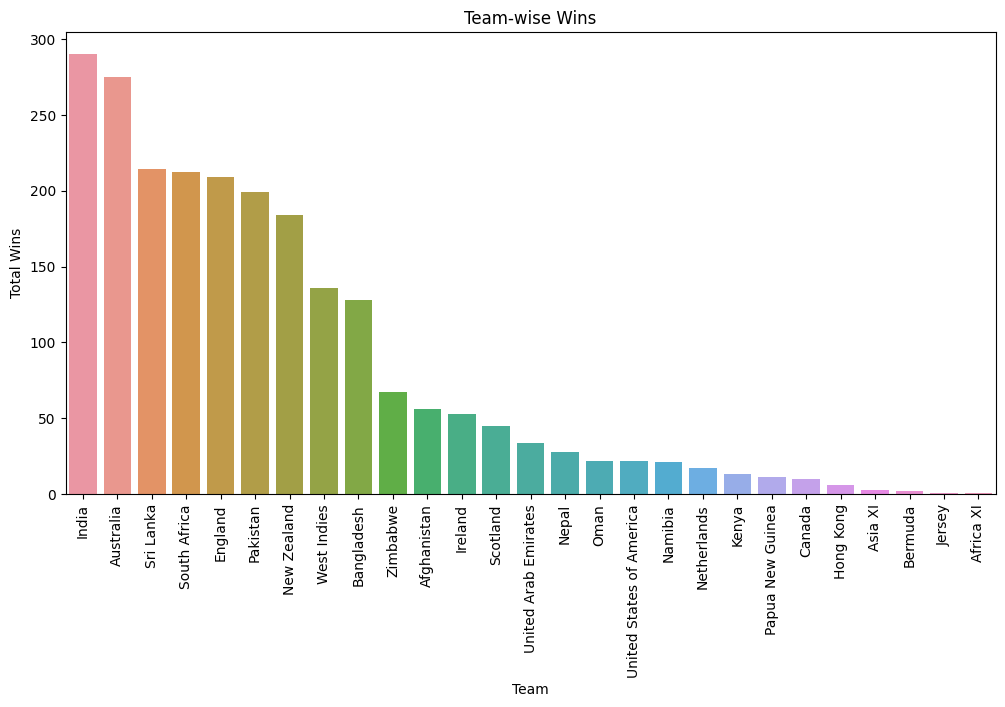

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title('Team-wise Wins')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)

In [23]:
#most frequent used venues
top_venues = match_info['venue'].value_counts().head(10)

Text(0, 0.5, 'Venue')

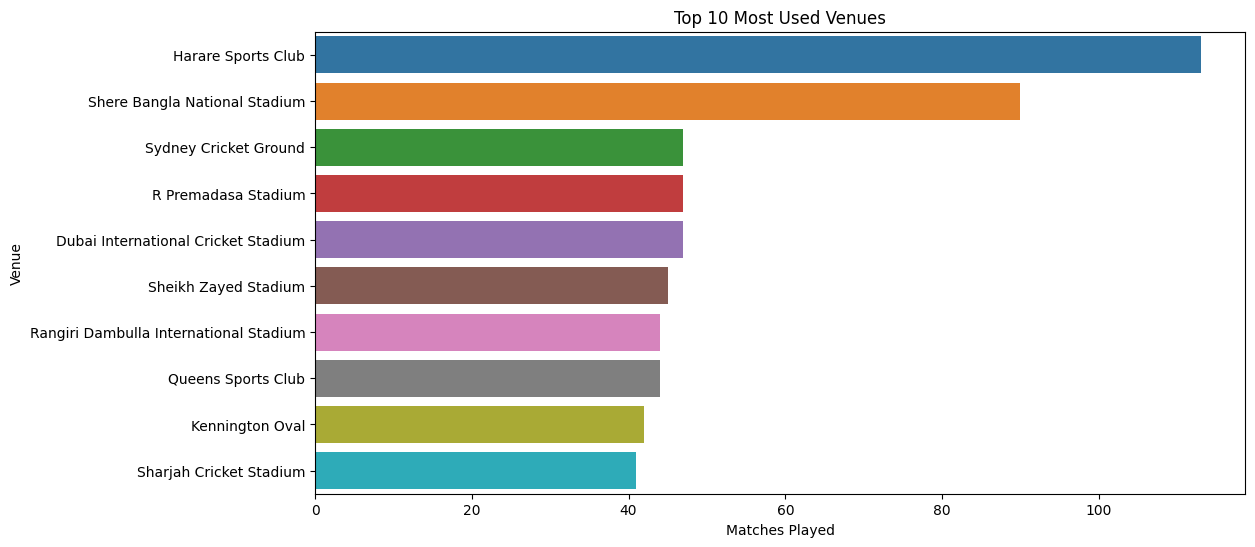

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_venues.values, y=top_venues.index)
plt.title('Top 10 Most Used Venues')
plt.xlabel('Matches Played')
plt.ylabel('Venue')

In [25]:
#top player of the match winners
top_players = match_info['player_of_match'].value_counts().head(10)

Text(0, 0.5, 'Players')

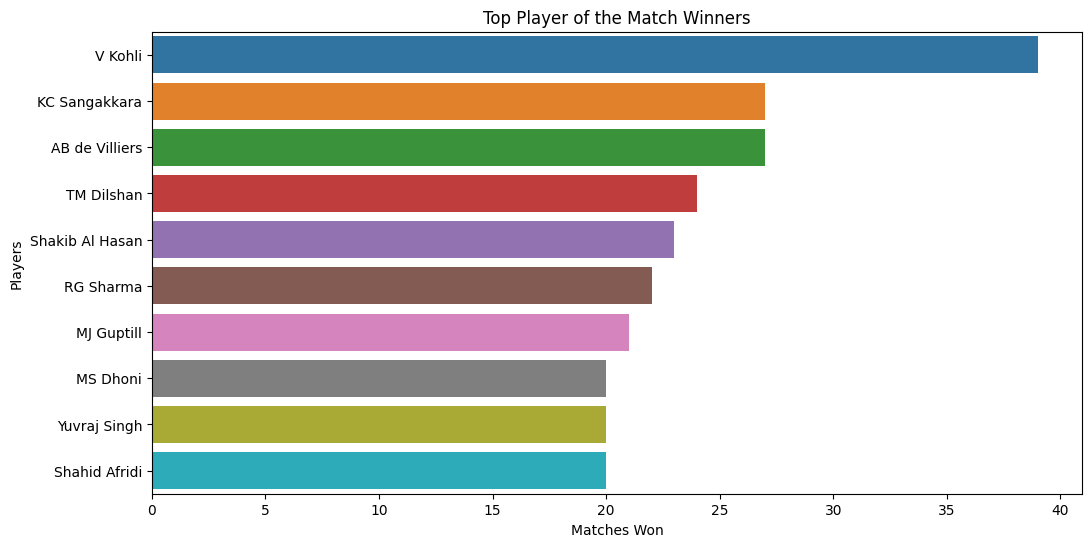

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_players.values, y=top_players.index)
plt.title('Top Player of the Match Winners')
plt.xlabel('Matches Won')
plt.ylabel('Players')

Text(0, 0.5, 'Frequency')

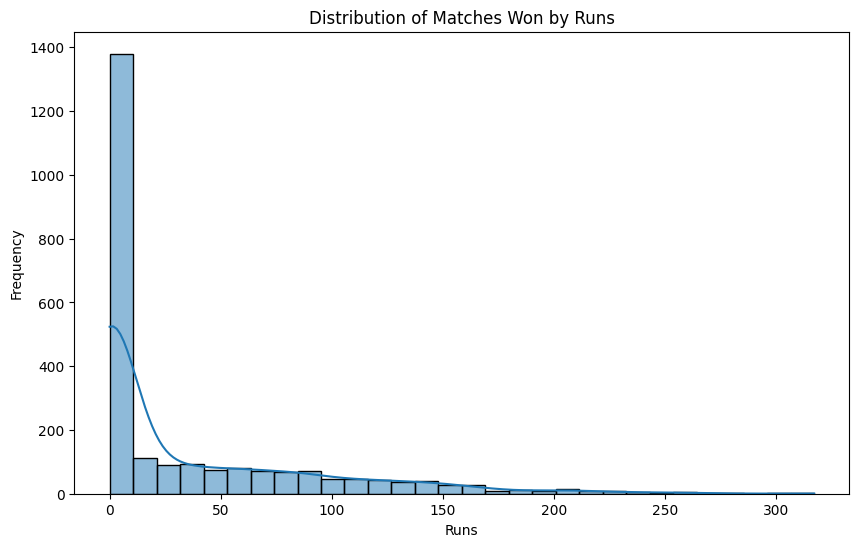

In [27]:
#match outcomes
plt.figure(figsize=(10,6))
sns.histplot(match_info['win_by_runs'], bins=30, kde=True)
plt.title('Distribution of Matches Won by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

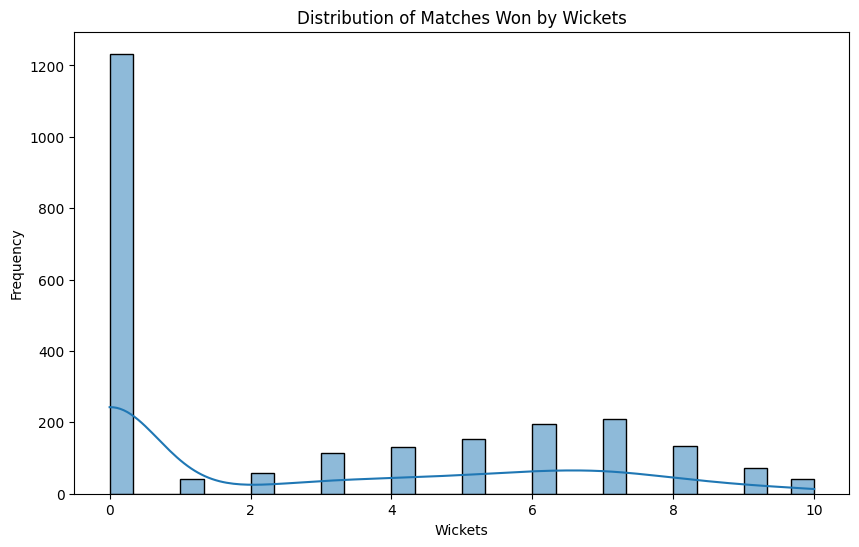

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(match_info['win_by_wickets'], bins=30, kde=True)
plt.title('Distribution of Matches Won by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')

In [29]:
#toss decision 
toss_decision = match_info['toss_decision'].value_counts()

Text(0, 0.5, 'Frequency')

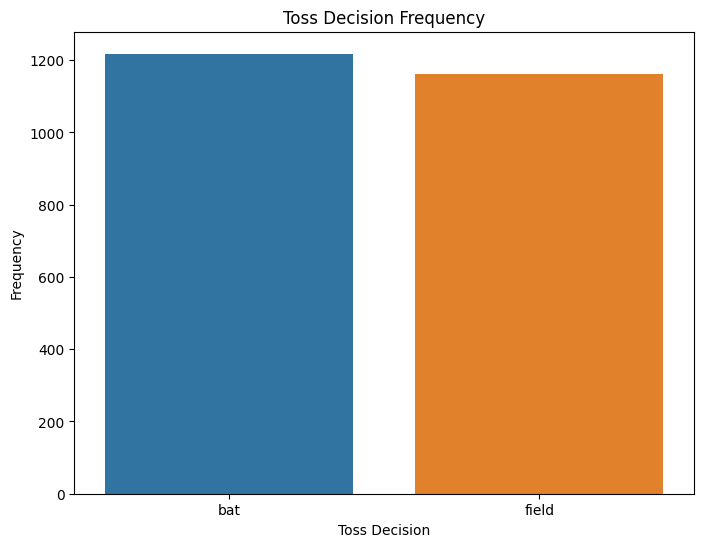

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=toss_decision.index, y=toss_decision.values)
plt.title('Toss Decision Frequency')
plt.xlabel('Toss Decision')
plt.ylabel('Frequency')

In [31]:
#correlation matrix
correlation_matrix = match_info.corr(numeric_only=True)

Text(0.5, 1.0, 'Correlation Heatmap')

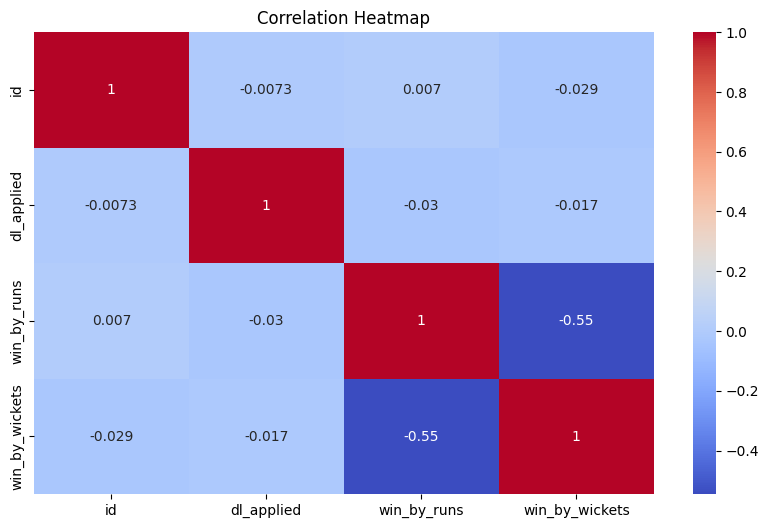

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [33]:
#identifying top 10 run scorers
batsmen_total_runs = match_data.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Batsman')

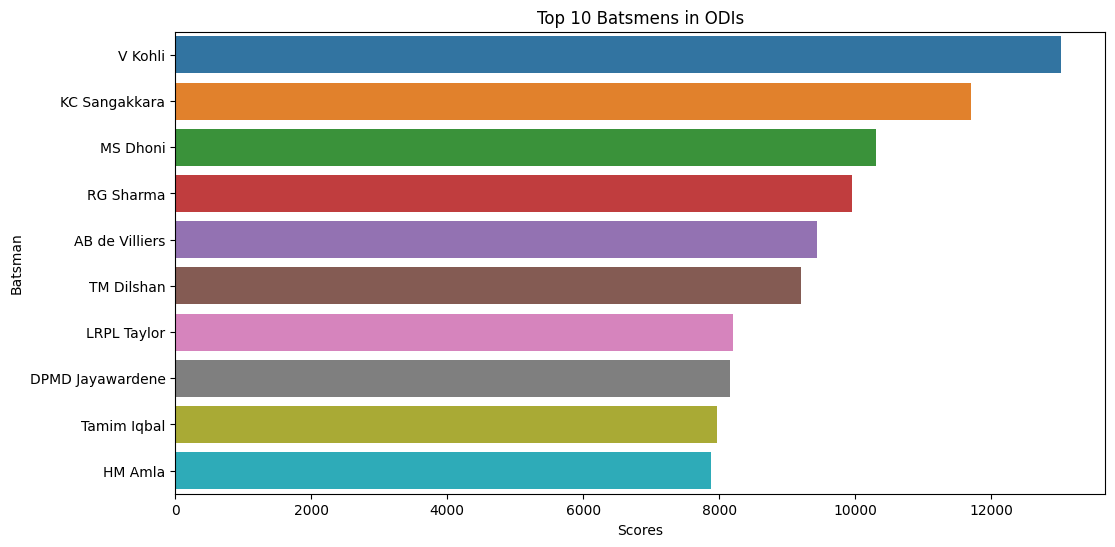

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=batsmen_total_runs.values, y=batsmen_total_runs.index)
plt.title('Top 10 Batsmens in ODIs')
plt.xlabel('Scores')
plt.ylabel('Batsman')

In [35]:
#identifying top 10 wicket takers
top_bowlers_wickets = match_data[match_data['wicket_type'].notnull()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Bowler')

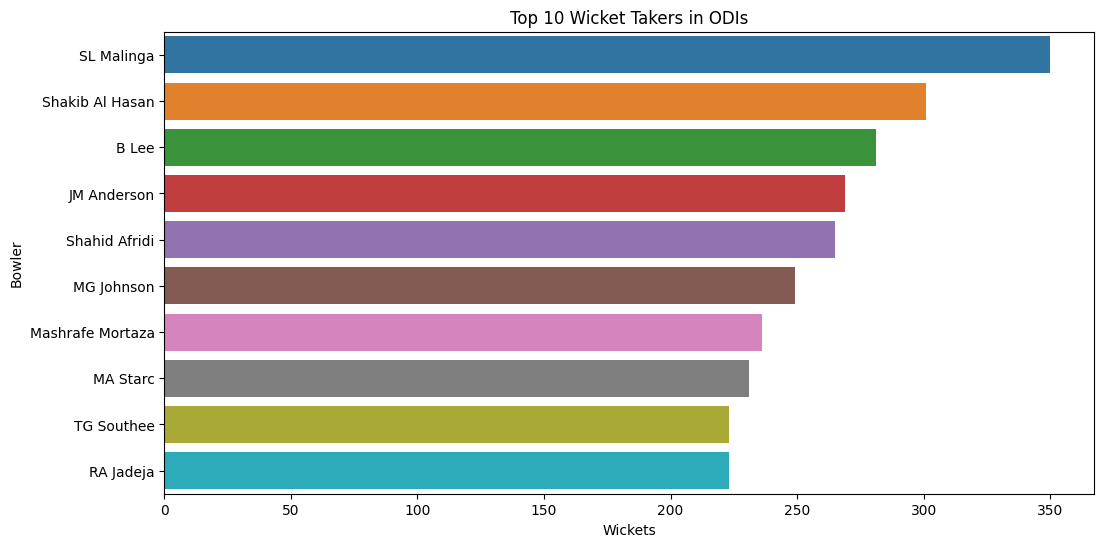

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_bowlers_wickets.values, y=top_bowlers_wickets.index)
plt.title('Top 10 Wicket Takers in ODIs')
plt.xlabel('Wickets')
plt.ylabel('Bowler')

In [37]:
#top 10 run-scorers and wicket-takers
top_10_batsmen = batsmen_total_runs.index.tolist()
top_10_bowlers = top_bowlers_wickets.index.tolist()

In [41]:
#list of team rivarlies (for example: india vs pakistan, australia vs england)
team_rivarlies = [('India', 'Pakistan'), ('Australia', 'England')]

In [42]:
#initializing a dictionary to store head-to-head performances
rivarly_performance = {}

In [43]:
#calculating win-loss records for each rivarly
for team1, team2 in team_rivarlies:
    #filtering matches where team1 played against team2
    head_to_head_matches = match_info[((match_info['team1'] == team1) & (match_info['team2'] == team2)) | 
                                      ((match_info['team1'] == team2) & (match_info['team2'] == team1))]
    #calculating wins for each team
    team1_wins = head_to_head_matches[head_to_head_matches['winner'] == team1].shape[0]
    team2_wins = head_to_head_matches[head_to_head_matches['winner'] == team2].shape[0]
    #storing the performance 
    rivarly_performance[f'{team1} vs {team2}'] = {'Wins': [team1_wins, team2_wins]}

In [44]:
#creating a dataframe for visualization
rivarly_df = pd.DataFrame(rivarly_performance).T

In [45]:
#extracting the number of wins for team1 and team2
rivarly_df['Team1 Wins'] = rivarly_df['Wins'].apply(lambda x: x[0])
rivarly_df['Team2 Wins'] = rivarly_df['Wins'].apply(lambda x: x[1])

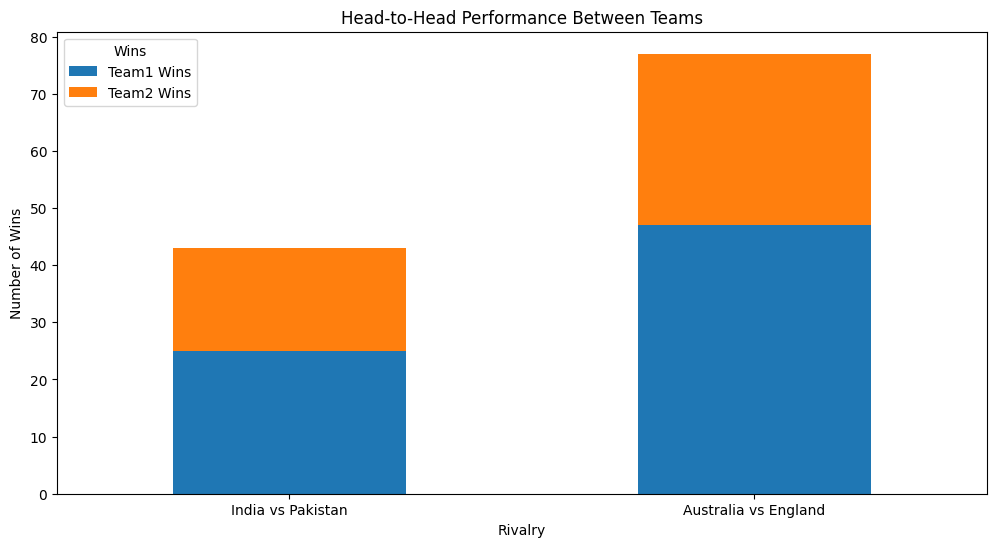

In [46]:
rivarly_df[['Team1 Wins', 'Team2 Wins']].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Head-to-Head Performance Between Teams')
plt.xlabel('Rivalry')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0)
plt.legend(title='Wins', loc='best')

In [47]:
#extracting columns for toss decision and winner 
toss_decision = match_info['toss_decision']
winner = match_info['winner']

In [48]:
#calculating win percentages fo different toss decisions
total_matches = len(toss_decision)
bat_wins = sum((toss_decision == 'bat') & (winner == match_info['team1']))
field_wins = sum((toss_decision == 'field') & (winner == match_info['team2']))

In [49]:
bat_win_percentage = (bat_wins / total_matches) * 100
field_win_percentage = (field_wins / total_matches) * 100

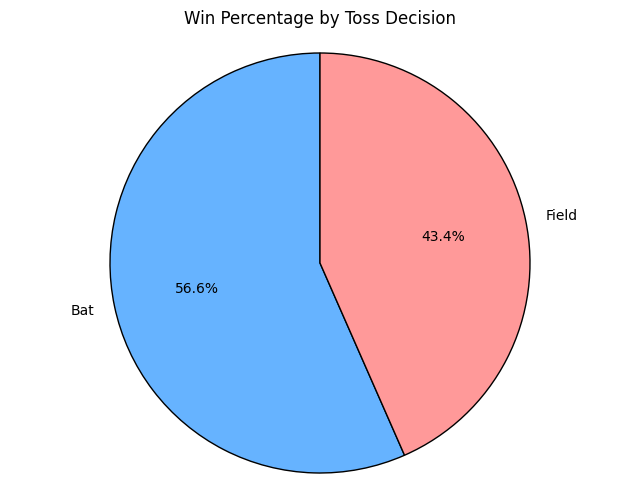

In [50]:
import matplotlib.pyplot as plt

# Data for the win percentages
win_percentages = [bat_win_percentage, field_win_percentage]
labels = ['Bat', 'Field']
colors = ['#66b3ff', '#ff9999']  # Optional color palette

# Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(win_percentages, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Win Percentage by Toss Decision')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


In [51]:
#extracting relevant columns: date, venue, result
selected_columns = ['date', 'venue', 'result']

In [52]:
#creating a subset of the dataset with the selected columns
subset_data = match_info[selected_columns]

In [53]:
#calculating match duration in hours 
subset_data['date'] = pd.to_datetime(subset_data['date'])
subset_data['match_duration_hours'] = (subset_data['date'].shift(-1) - subset_data['date']).dt.total_seconds() / 3600

/tmp/ipykernel_32/1039297706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['date'] = pd.to_datetime(subset_data['date'])
/tmp/ipykernel_32/1039297706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['match_duration_hours'] = (subset_data['date'].shift(-1) - subset_data['date']).dt.total_seconds() / 3600


Text(0, 0.5, 'Frequency')

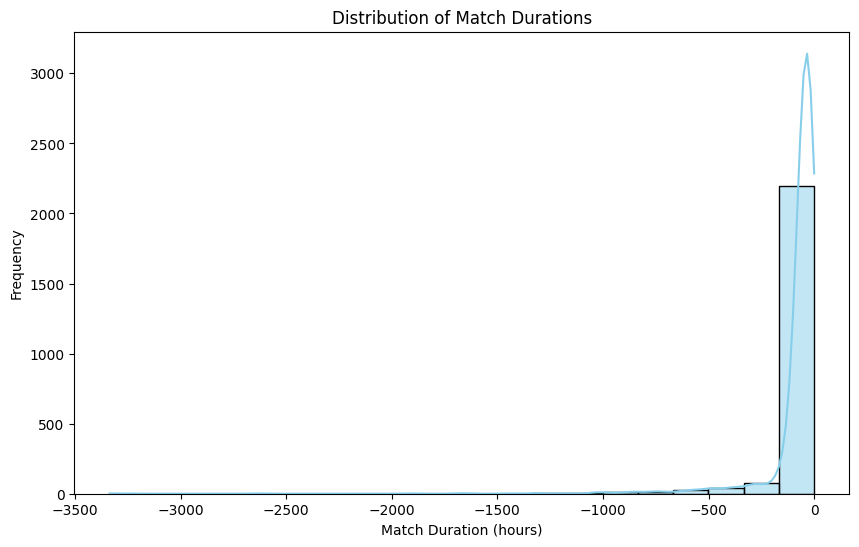

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['match_duration_hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Match Durations')
plt.xlabel('Match Duration (hours)')
plt.ylabel('Frequency')

In [62]:
#Top 10 Bowlers with the Best Bowling Averages (Minimum 50 Wickets)

****Top 10 Bowlers with the Best Bowling Averages (Minimum 50 Wickets)****

In [60]:
bowler_stats = match_data.groupby('bowler').agg(
    runs_given=('runs_off_bat', 'sum'), 
    wickets_taken=('wicket_type', lambda x: x.notnull().sum())
).reset_index()

# Filter bowlers with at least 50 wickets
bowler_stats = bowler_stats[bowler_stats['wickets_taken'] >= 50]

#Calculate the bowling average
bowler_stats['bowling_average'] = bowler_stats['runs_given'] / bowler_stats['wickets_taken']

#Sort by the bowling average and get the top 10
top_10_bowlers = bowler_stats.sort_values(by='bowling_average').head(10)

top_10_bowlers



,bowler,runs_given,wickets_taken,bowling_average
1064,S Lamichhane,1878,113,16.619469
1041,Rashid Khan,3134,182,17.219780
843,Mohammed Siraj,945,54,17.500000
405,GD McGrath,1987,109,18.229358
6,A Flintoff,2421,132,18.340909
207,Bilal Khan,1801,95,18.957895
230,CB Sole,1049,55,19.072727
1089,SE Bond,2156,113,19.079646
186,BM Scholtz,1040,54,19.259259
1142,SW Tait,1278,66,19.363636


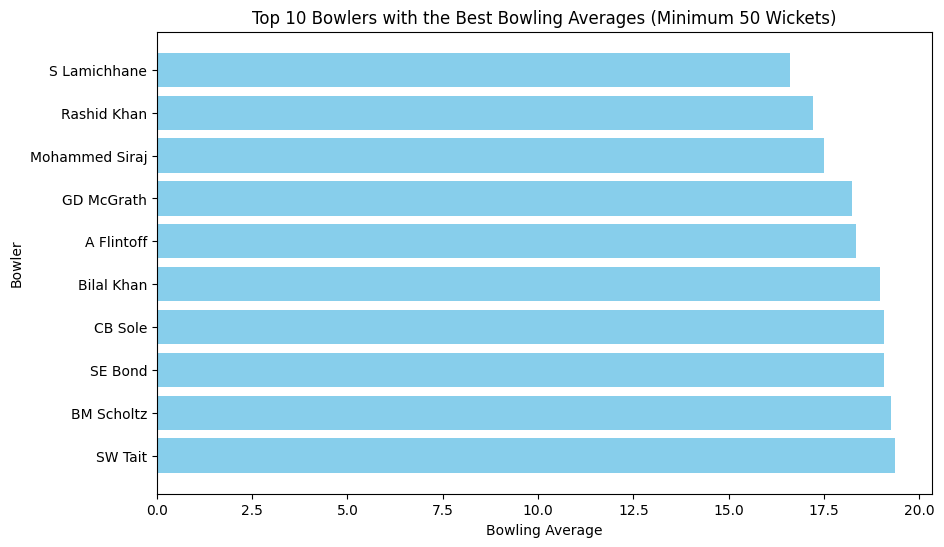

In [61]:
import matplotlib.pyplot as plt

# Plot the results as a bar chart
plt.figure(figsize=(10,6))
plt.barh(top_10_bowlers['bowler'], top_10_bowlers['bowling_average'], color='skyblue')
plt.xlabel('Bowling Average')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers with the Best Bowling Averages (Minimum 50 Wickets)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the best bowler at the top
plt.show()